In [1]:
! pip install Quandl

In [40]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

### Get api key from file

In [2]:
api_key = ""
with open("../data/api/quandlapikey.key") as file:
    api_key = file.read()

### set quandl api key

In [3]:
quandl.ApiConfig.api_key=api_key

### Get house price of alska from quandl

In [4]:
df = quandl.get("FMAC/HPI_AK", api_key=api_key)
df.head 

<bound method NDFrame.head of              NSA Value    SA Value
Date                              
1975-01-31   34.427647   34.604936
1975-02-28   34.898074   35.035870
1975-03-31   35.384843   35.407964
1975-04-30   35.913989   35.784216
1975-05-31   36.534766   36.228856
...                ...         ...
2021-01-31  197.548885  198.216004
2021-02-28  198.327619  198.578509
2021-03-31  199.614324  199.155456
2021-04-30  201.279907  199.759017
2021-05-31  202.779493  200.351900

[557 rows x 2 columns]>

# The we need the state code of all states, so we gone to fetch all the state details from *Wikipedia* [Link](https://simple.wikipedia.org/wiki/List_of_U.S._states)


### first let us fetch the table data from wikipedia

In [5]:
states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")
states[0]

Flag, name and postal abbreviation [1]   
   Flag, name and postal abbreviation [1]   
0                                 Alabama  \
1                                  Alaska   
2                                 Arizona   
3                                Arkansas   
4                              California   
5                                Colorado   
6                             Connecticut   
7                                Delaware   
8                                 Florida   
9                                 Georgia   
10                                 Hawaii   
11                                  Idaho   
12                               Illinois   
13                                Indiana   
14                                   Iowa   
15                                 Kansas   
16                            Kentucky[B]   
17                              Louisiana   
18                                  Maine   
19                               Maryland   
20                       Massachusetts[B]   
21                               Michigan   
22                              Minnesota   
23                            Mississippi   
24                               Missouri   
25                                Montana   
26                               Nebraska   
27                                 Nevada   
28                          New Hampshire   
29                             New Jersey   
30                             New Mexico   
31                               New York   
32                         North Carolina   
33                           North Dakota   
34                                   Ohio   
35                               Oklahoma   
36                                 Oregon   
37                        Pennsylvania[B]   
38                           Rhode Island   
39                         South Carolina   
40                           South Dakota   
41                              Tennessee   
42                                  Texas   
43                                   Utah   
44                                Vermont   
45                            Virginia[B]   
46                             Washington   
47                          West Virginia   
48                              Wisconsin   
49                                Wyoming   

                                                     Cities   
   Flag, name and postal abbreviation [1].1         Capital   
0                                        AL      Montgomery  \
1                                        AK          Juneau   
2                                        AZ         Phoenix   
3                                        AR     Little Rock   
4                                        CA      Sacramento   
5                                        CO          Denver   
6                                        CT        Hartford   
7                                        DE           Dover   
8                                        FL     Tallahassee   
9                                        GA         Atlanta   
10                                       HI        Honolulu   
11                                       ID           Boise   
12                                       IL     Springfield   
13                                       IN    Indianapolis   
14                                       IA      Des Moines   
15                                       KS          Topeka   
16                                       KY       Frankfort   
17                                       LA     Baton Rouge   
18                                       ME         Augusta   
19                                       MD       Annapolis   
20                                       MA          Boston   
21                                       MI         Lansing   
22                                       MN      Saint Paul   
23                                       MS         Jackson   
24                      

### we can get the list of columns and can filter the columns with help of column

In [6]:
states[0].columns

MultiIndex([('Flag, name and postal abbreviation [1]', ...),
            ('Flag, name and postal abbreviation [1]', ...),
            (                                'Cities', ...),
            (                                'Cities', ...),
            (                        'Established[A]', ...),
            (                        'Population [3]', ...),
            (                         'Total area[4]', ...),
            (                         'Total area[4]', ...),
            (                          'Land area[4]', ...),
            (                          'Land area[4]', ...),
            (                         'Water area[4]', ...),
            (                         'Water area[4]', ...),
            (                       'Number of Reps.', ...)],
           )

## they are multi indexed columns, we actully need this column the abbrevation. it is present in 2 column, so let us get that column by `states[0].columns[1]`

### We could find some of the data what we actully need, we can get the list of all state abbreviation in single valuable

In [7]:

def get_quandl_formated(item):
    return f"FMAC/HPI_{item}"

abbv_series = pd.Series(states[0][states[0].columns[1]].to_list())
abbv_series

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
dtype: object

### Create a main dataframe to store all the states data

In [8]:
 main_df = pd.DataFrame()


In [21]:
for abbv in abbv_series.values:
    query = get_quandl_formated(abbv)
    df = quandl.get(query)
    df.rename(columns={'NSA Value': f"NSA_Value_{abbv}", "SA Value" : f"SA_Value_{abbv}"}, inplace=True)
    # print(df.head())
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.merge(df)

In [27]:
main_df.head()

,NSA Value,SA Value,NSA_Value_AL,SA_Value_AL,NSA_Value_AK,SA_Value_AK,NSA_Value_AZ,SA_Value_AZ,NSA_Value_AR,SA_Value_AR,...,NSA_Value_VA,SA_Value_VA,NSA_Value_WA,SA_Value_WA,NSA_Value_WV,SA_Value_WV,NSA_Value_WI,SA_Value_WI,NSA_Value_WY,SA_Value_WY
0,35.105461,35.167764,35.105461,35.167764,34.427647,34.604936,28.988550,28.967806,37.884338,37.770761,...,27.703300,27.628050,17.524210,17.511135,42.835674,42.838255,27.712291,27.783014,31.211572,31.174526
1,35.465209,35.529189,35.465209,35.529189,34.898074,35.035870,29.450345,29.450035,37.911270,37.803814,...,28.014973,27.936771,17.664428,17.643281,44.069156,43.984922,28.106606,28.162877,31.699763,31.669633
2,35.843110,35.854669,35.843110,35.854669,35.384843,35.407964,29.864697,29.848097,37.921414,37.826190,...,28.243683,28.141810,17.821548,17.748555,45.356402,45.135358,28.478306,28.442934,32.206778,32.156860
3,36.251850,36.204131,36.251850,36.204131,35.913989,35.784216,30.152361,30.103491,37.938932,37.854430,...,28.401542,28.225428,17.965975,17.849691,46.675605,46.337792,28.794104,28.635794,32.715980,32.602327
4,36.595350,36.487839,36.595350,36.487839,36.534766,36.228856,30.264010,30.168881,38.019940,37.899527,...,28.543421,28.325018,18.075541,17.901681,47.974695,47.534735,29.044444,28.747946,33.191611,32.968711


### Write the dataframe date to pickle file

In [30]:
pickle_out = open("../data/dump/fiddy_states.pickle", "wb")
pickle.dump(main_df, pickle_out)
pickle_out.close()

## Read the dump and convert to dataframe

### Way 1

In [33]:
pickle_in = open("../data/dump/fiddy_states.pickle", "rb")
HPI_data = pickle.load(pickle_in)
pickle_in.close()
HPI_data

,NSA Value,SA Value,NSA_Value_AL,SA_Value_AL,NSA_Value_AK,SA_Value_AK,NSA_Value_AZ,SA_Value_AZ,NSA_Value_AR,SA_Value_AR,...,NSA_Value_VA,SA_Value_VA,NSA_Value_WA,SA_Value_WA,NSA_Value_WV,SA_Value_WV,NSA_Value_WI,SA_Value_WI,NSA_Value_WY,SA_Value_WY
0,35.105461,35.167764,35.105461,35.167764,34.427647,34.604936,28.988550,28.967806,37.884338,37.770761,...,27.703300,27.628050,17.524210,17.511135,42.835674,42.838255,27.712291,27.783014,31.211572,31.174526
1,35.465209,35.529189,35.465209,35.529189,34.898074,35.035870,29.450345,29.450035,37.911270,37.803814,...,28.014973,27.936771,17.664428,17.643281,44.069156,43.984922,28.106606,28.162877,31.699763,31.669633
2,35.843110,35.854669,35.843110,35.854669,35.384843,35.407964,29.864697,29.848097,37.921414,37.826190,...,28.243683,28.141810,17.821548,17.748555,45.356402,45.135358,28.478306,28.442934,32.206778,32.156860
3,36.251850,36.204131,36.251850,36.204131,35.913989,35.784216,30.152361,30.103491,37.938932,37.854430,...,28.401542,28.225428,17.965975,17.849691,46.675605,46.337792,28.794104,28.635794,32.715980,32.602327
4,36.595350,36.487839,36.595350,36.487839,36.534766,36.228856,30.264010,30.168881,38.019940,37.899527,...,28.543421,28.325018,18.075541,17.901681,47.974695,47.534735,29.044444,28.747946,33.191611,32.968711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,171.122944,172.123016,171.122944,172.123016,197.548885,198.216004,251.880763,252.321995,173.071789,173.854902,...,225.385653,226.211813,283.150836,284.724075,166.568487,167.420905,174.816053,176.965675,228.296984,228.141680
553,172.927336,173.700685,172.927336,173.700685,198.327619,198.578509,258.105023,258.152037,174.593349,175.222591,...,228.259326,228.566252,289.701915,289.445763,167.539691,168.434414,176.891185,178.653576,232.145707,232.034309
554,176.051110,176.193957,176.051110,176.193957,199.614324,199.155456,264.524727,263.935432,177.273136,177.443410,...,231.900775,231.145925,297.786820,295.137962,168.583975,168.967002,180.282125,180.801619,236.519686,236.296877
555,179.804289,179.101603,179.804289,179.101603,201.279907,199.759017,270.608609,269.467820,180.632445,180.287711,...,236.396308,234.007997,305.710595,300.972589,169.498235,169.124847,184.396504,183.293736,240.799820,240.418326


### Way 2

In [35]:
HPI_data = pd.read_pickle("../data/dump/fiddy_states.pickle")
HPI_data

,NSA Value,SA Value,NSA_Value_AL,SA_Value_AL,NSA_Value_AK,SA_Value_AK,NSA_Value_AZ,SA_Value_AZ,NSA_Value_AR,SA_Value_AR,...,NSA_Value_VA,SA_Value_VA,NSA_Value_WA,SA_Value_WA,NSA_Value_WV,SA_Value_WV,NSA_Value_WI,SA_Value_WI,NSA_Value_WY,SA_Value_WY
0,35.105461,35.167764,35.105461,35.167764,34.427647,34.604936,28.988550,28.967806,37.884338,37.770761,...,27.703300,27.628050,17.524210,17.511135,42.835674,42.838255,27.712291,27.783014,31.211572,31.174526
1,35.465209,35.529189,35.465209,35.529189,34.898074,35.035870,29.450345,29.450035,37.911270,37.803814,...,28.014973,27.936771,17.664428,17.643281,44.069156,43.984922,28.106606,28.162877,31.699763,31.669633
2,35.843110,35.854669,35.843110,35.854669,35.384843,35.407964,29.864697,29.848097,37.921414,37.826190,...,28.243683,28.141810,17.821548,17.748555,45.356402,45.135358,28.478306,28.442934,32.206778,32.156860
3,36.251850,36.204131,36.251850,36.204131,35.913989,35.784216,30.152361,30.103491,37.938932,37.854430,...,28.401542,28.225428,17.965975,17.849691,46.675605,46.337792,28.794104,28.635794,32.715980,32.602327
4,36.595350,36.487839,36.595350,36.487839,36.534766,36.228856,30.264010,30.168881,38.019940,37.899527,...,28.543421,28.325018,18.075541,17.901681,47.974695,47.534735,29.044444,28.747946,33.191611,32.968711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,171.122944,172.123016,171.122944,172.123016,197.548885,198.216004,251.880763,252.321995,173.071789,173.854902,...,225.385653,226.211813,283.150836,284.724075,166.568487,167.420905,174.816053,176.965675,228.296984,228.141680
553,172.927336,173.700685,172.927336,173.700685,198.327619,198.578509,258.105023,258.152037,174.593349,175.222591,...,228.259326,228.566252,289.701915,289.445763,167.539691,168.434414,176.891185,178.653576,232.145707,232.034309
554,176.051110,176.193957,176.051110,176.193957,199.614324,199.155456,264.524727,263.935432,177.273136,177.443410,...,231.900775,231.145925,297.786820,295.137962,168.583975,168.967002,180.282125,180.801619,236.519686,236.296877
555,179.804289,179.101603,179.804289,179.101603,201.279907,199.759017,270.608609,269.467820,180.632445,180.287711,...,236.396308,234.007997,305.710595,300.972589,169.498235,169.124847,184.396504,183.293736,240.799820,240.418326


### Try to plt the above HPI data using matplotlib

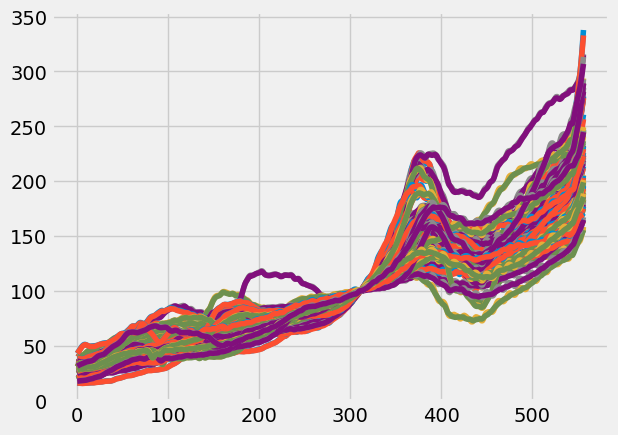

In [45]:
HPI_data.plot()
plt.legend().remove()
plt.show()